# Interior Point Methods

## installation

##### install CVXOPT and CVXPY packages

In [1]:
import cvxopt
import cvxpy
## NOTE: need to change suitesparse package to 4.5.3
## $ conda install -c conda-forge suitesparse==4.5.3
import optimize

##### install specific CVXOPT packages

In [2]:
## import L1-Regularized LS solver (over- or under- determined)
from cvxopt import l1regls

## import L1-Approx solver (overdetermined)
from cvxopt import l1

## import random normal
from cvxopt import normal

##### install additional Python packages

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt

## examples

##### problem: L1 Norm Approx, non-sparse, underdetermined

     pcost       dcost       gap    pres   dres
 0: -1.4597e+02 -4.5427e+01  2e+02  3e+01  1e-13
 1: -5.2422e+01 -4.4988e+01  2e+01  2e+00  8e-15
 2: -4.5350e+01 -4.3034e+01  7e+00  9e-01  3e-15
 3: -4.2143e+01 -4.2377e+01  3e+00  2e-01  2e-15
 4: -4.1954e+01 -4.2097e+01  1e+00  8e-02  2e-15
 5: -4.1921e+01 -4.2007e+01  4e-01  3e-02  2e-15
 6: -4.1945e+01 -4.1973e+01  9e-02  6e-03  4e-15
 7: -4.1952e+01 -4.1963e+01  2e-02  5e-04  9e-15
 8: -4.1960e+01 -4.1962e+01  2e-03  4e-05  9e-15
 9: -4.1961e+01 -4.1961e+01  2e-04  4e-06  5e-14
10: -4.1961e+01 -4.1961e+01  3e-06  6e-08  2e-13
Optimal solution found.
0.0103051662445
(50, 200)
(50, 1)
(200, 200)
(200,)
((200,), (200, 200))
(200,)
(200,)
()
(200,)
((200,), (200,))
(<type 'numpy.float64'>, 0.0041669814236465234)
CG: 0.004055
     pcost       dcost       gap    pres   dres
 0: -1.5140e+03 -5.1333e+02  2e+03  1e+02  3e-12
 1: -5.5583e+02 -5.1269e+02  9e+01  4e+00  1e-13
 2: -5.1387e+02 -5.0447e+02  3e+01  1e+00  4e-14
 3: -5.0216e+02 -5.

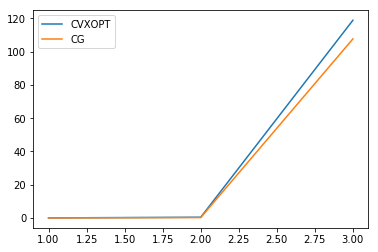

In [5]:
## solver: CVXOPT custom KKT l1regls
k = 3
times = []
cg_times = []
cgs = optimize.ConjugateGradientsSolver(A=None, b=None, full_output=0)
for e in range(1,k+1):    
    f = 10**e
    m, n = 5*f, 20*f
    A, b = normal(m,n), normal(m,1)

    t1 = time.time()
    x = cvxopt.l1regls.l1regls(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)
    
    cg_t1 = time.time()
    A = np.array(A)
    b = np.array(b)
    print(A.shape)
    print(b.shape)
    
    AtA = np.array(A.T.dot(A))
    Atb = np.array(A.T.dot(b)).reshape(n,)
    print(AtA.shape)
    print(Atb.shape)
    
    
    cgs.A, cgs.b = AtA, Atb
    x_cg = cgs.solve()
    cg_t = time.time() - cg_t1
    cg_times.append(cg_t)
    print('CG: %f' % cg_t)

    
plt.plot(range(1,k+1), times)
plt.plot(range(1,k+1), cg_times)
plt.legend(['CVXOPT', 'CG'])
plt.show()

In [ ]:
## solver: MOSEK via CVXOPT
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 5*f, 20*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1regls.l1regls_mosek(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

##### problem: L1 Norm Approx, non-sparse, overdetermined

In [ ]:
## solver: CVXOPT custom KKT l1regls
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 20*f, 5*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1regls.l1regls(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

In [ ]:
## solver: MOSEK via CVXOPT
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 20*f, 5*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1regls.l1regls_mosek(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

In [ ]:
## solver: CVXOPT custom KKT l1
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 20*f, 5*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1.l1(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

In [ ]:
# from cvxpy import *
# import numpy

# # Problem data.
# m = 30
# n = 50
# numpy.random.seed(1)
# A = numpy.random.randn(m, n)
# b = numpy.random.randn(m)

# # Construct the problem.
# x = Variable(n)
# objective = Minimize(sum(x) )
# constraints = [0 <= x, numpy.dot(A,x) == b]
# prob = Problem(objective, constraints)

# # The optimal objective is returned by prob.solve().
# result = prob.solve()
# # The optimal value for x is stored in x.value.
# print(x.value)
# # The optimal Lagrange multiplier for a constraint
# # is stored in constraint.dual_value.
# print(constraints[0].dual_value)